In [21]:
%matplotlib inline
import sys
import os
sys.path.append("../src")
from graphprobe import loadviz, summarize
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import datetime

In [22]:
 category_colors = OrderedDict([                                                
       ('scene',    '#3288bd'),                                                   
       ('object',   '#99d594'),                                                   
       ('part',     '#e6f598'),                                                   
      ('material', '#fee08b'),                                                   
      ('texture',  '#fc8d59'),                                                   
      ('color',    '#d53e4f'),                                                  
      ('total',    '#aaaaaa')])
threshold = 0.05
categories = set(category_colors.keys())  
num_blobs = 8
script = "/home/nakamura/network_dissection/NetDissect/research/comparison_high_resolution_numdetec_1215.ipynb"

In [86]:
# define models
alex = {}
alex["name"] = "alexnet_imagenet"
alex["directory"] = "../dissection/alexnet_imagenet_full_conv_384/"
alex["blobs"] = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_material = {}
vgg_material["name"] = "vgg_material"
vgg_material["directory"] = "../dissection/vgg_material_full_conv/"
vgg_material["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

sentibank = {}
sentibank["name"] = "sentibank"
sentibank["directory"] = "../dissection/caffe_sentibank_full_conv/"
sentibank["blobs"] = ["conv1", "conv2","conv3", "conv4", "conv5", "fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face = {}
vgg_face["name"] = "vgg_face"
vgg_face["directory"] = "../dissection/VGG_FACE_full_conv/"
vgg_face["blobs"] = ["conv1_2", "conv2_2","conv3_3", "conv4_3", "conv5_3", "fc6-conv", "fc7-conv", "fc8-conv"]

alex_hi = {}
alex_hi["name"] = "alenet_imagenet_768"
alex_hi["directory"] = "../dissection_test/alexnet_imagenet_full_conv_768/"
alex_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

senti_hi = {}
senti_hi["name"] = "sentibank_768"
senti_hi["directory"] = "../dissection_test/caffe_sentibank_full_conv/"
senti_hi["blobs"] =  ["fc6-conv", "fc7-conv", "fc8-conv"]

vgg_mat_hi = {}
vgg_mat_hi["name"] = "vgg_material_768"
vgg_mat_hi["directory"] = "../dissection_test/vgg_material_full_conv/"
vgg_mat_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

vgg_face_hi = {}
vgg_face_hi["name"] = "vgg_face_768"
vgg_face_hi["directory"] = "../dissection_test/VGG_FACE_full_conv/"
vgg_face_hi["blobs"] = ["fc6-conv", "fc7-conv", "fc8-conv"]

models = [alex, vgg_material, sentibank, vgg_face, alex_hi, senti_hi, vgg_mat_hi, vgg_face_hi]
low_models = [alex, vgg_material, sentibank, vgg_face]
high_models = [alex_hi, senti_hi, vgg_mat_hi, vgg_face_hi]

In [87]:
now = datetime.datetime.now()

data[network_name] = [blob1, blob2, ...]

In [88]:
def make_data(models, cat):
    data = {}
    
    for model in models:
        data[model["name"]] = []
        for blob in model["blobs"]:
            stats = summarize(loadviz(model["directory"], blob), threshold, top_only=True)
            data[model["name"]].append(stats[cat])
    return data

In [89]:
def plot_graph(models, cat):
    data = make_data(models, cat)
    fig = plt.figure(figsize=(12, 8))
    ax = plt.gca()
    for model in models:
        ax.plot(data[model["name"]], label=model["name"])
    ax.set_xticks(range(len(models[0]["blobs"])))
    ax.set_xticklabels(models[0]["blobs"])
    ax.set_title("Comparison_of_number_of_detectors_{}".format(cat))

    plt.legend(loc="upper left")

    ax.set_ylabel('portion of units alinged to a category concept')
    return fig, ax

In [95]:
def compare_high_low(low_model, high_model):
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.reshape(-1)
    categories = category_colors.keys()[:-1]
    
    for i, cat in enumerate(categories):
        data = make_data([low_model, high_model], cat)
        
        low_line, = axes[i].plot(data[low_model["name"]])
        highe_line, = axes[i].plot([5, 6, 7], data[high_model["name"]])
        
        fig.legend((low_line, highe_line), (low_model["name"], high_model["name"]), loc="upper right")
        fig.tight_layout()
        fig.subplots_adjust(top=0.87, bottom=0.1)
        
        axes[i].set_title(cat)
        axes[i].set_xticklabels(low_model["blobs"])
    return fig, axes

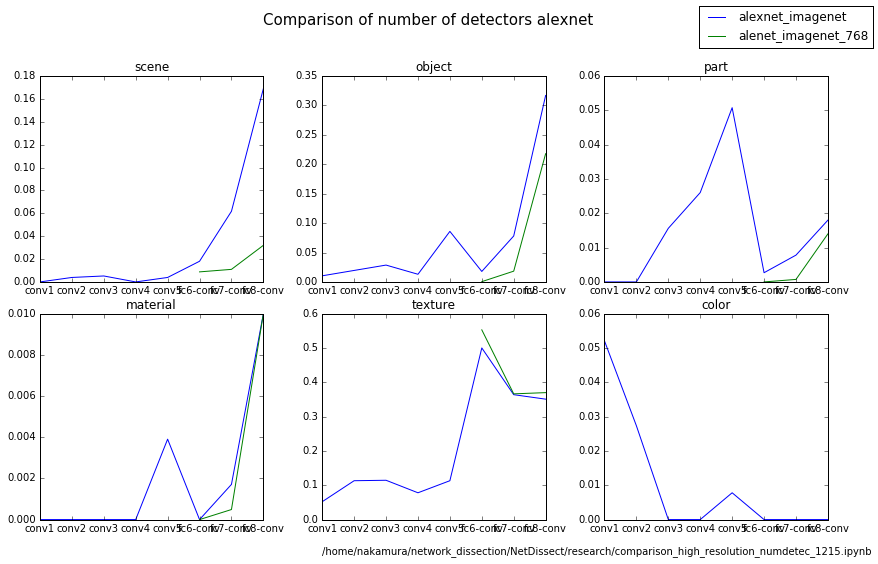

In [104]:
fig, axes = compare_high_low(alex, alex_hi)
axes[4].text(0,-0.1, script )
fig.suptitle("Comparison of number of detectors alexnet", fontsize=15)


fig.savefig(os.path.join("figures/number_of_detectors/", "comparison_num_of_detectors_alexnet.pdf"))
plt.show()

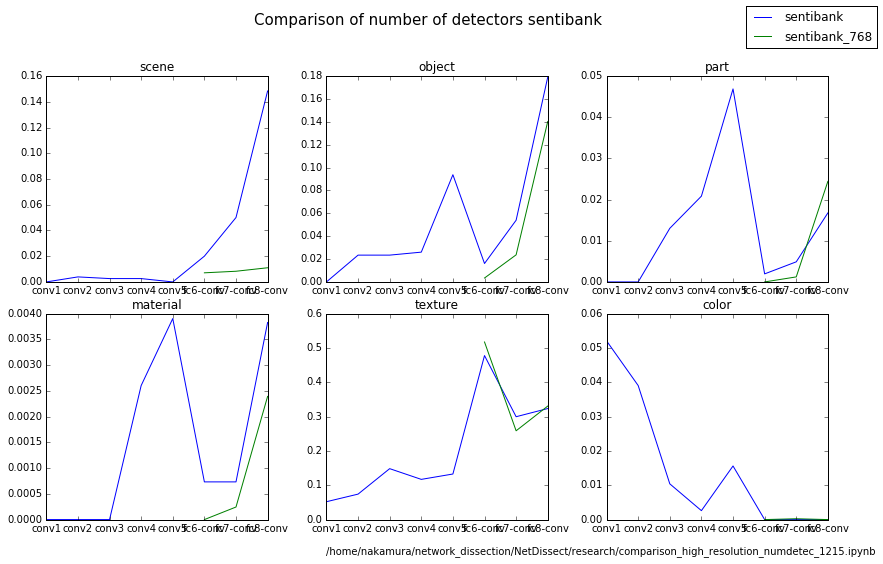

In [105]:
fig, axes = compare_high_low(sentibank, senti_hi)
axes[4].text(0,-0.1, script )
fig.suptitle("Comparison of number of detectors sentibank", fontsize=15)


fig.savefig(os.path.join("figures/number_of_detectors/", "comparison_num_of_detectors_sentibank.pdf"))
plt.show()

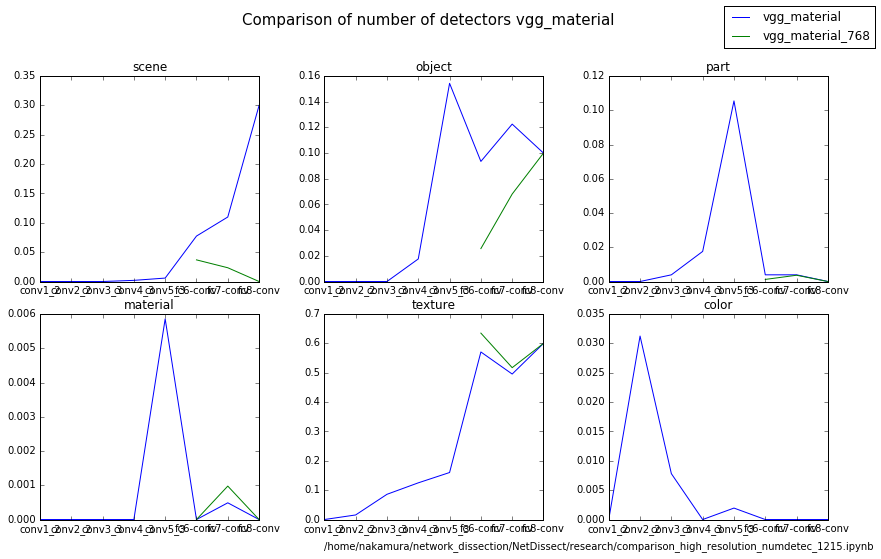

In [106]:
fig, axes = compare_high_low(vgg_material, vgg_mat_hi)
axes[4].text(0,-0.1, script )
fig.suptitle("Comparison of number of detectors vgg_material", fontsize=15)

fig.savefig(os.path.join("figures/number_of_detectors/", "comparison_num_of_detectors_vgg_material.pdf"))
plt.show()

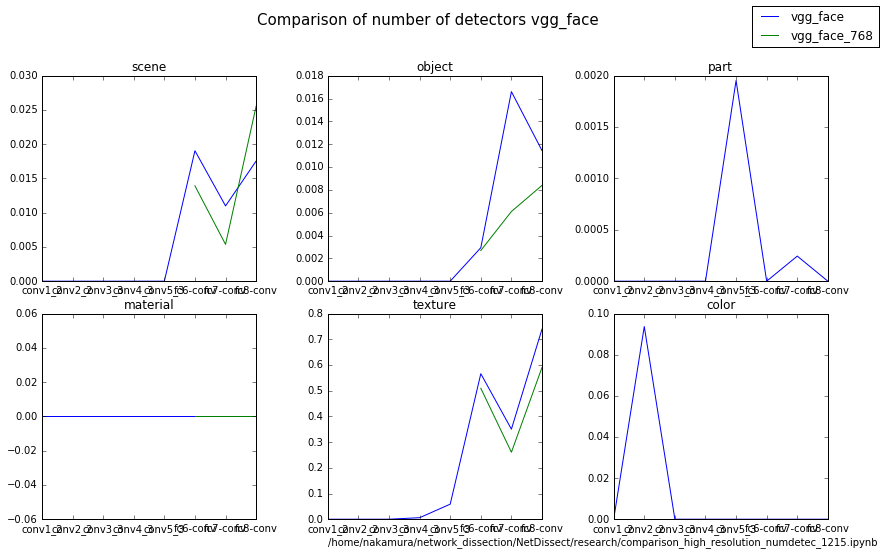

In [107]:
fig, axes = compare_high_low(vgg_face, vgg_face_hi)
axes[4].text(0,-0.1, script )
fig.suptitle("Comparison of number of detectors vgg_face", fontsize=15)

fig.savefig(os.path.join("figures/number_of_detectors/", "comparison_num_of_detectors_vgg_face.pdf"))
plt.show()